# Exploratory Data Analysis

## Setup

Download datasets to work directly from Google Colaboratory to preprocess the data ad install libraries.

In [ ]:
!wget -P . -c https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/pop-deaths-data.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-07-12/flights.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/ip2location/ip2location-iata-icao/master/iata-icao.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/data/employment_data.csv &> /dev/null
!wget -P . -c https://raw.githubusercontent.com/com-480-data-visualization/project-2023-dqw4w9wgxcq/master/docs/res/ne_110m_admin_0_countries_covid_cases.geojson &> /dev/null

In [ ]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Define imports, load Google Drive and move to project root path.

In [ ]:
!cp /content/ne_110m_admin_0_countries_covid_cases.geojson /content/drive/MyDrive/Data_Viz/ne_110m_admin_0_countries_covid_cases.geojson

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Data_Viz

/content/drive/MyDrive/Data_Viz


## Flags

In [ ]:
import requests
import os

flags_dir = '/content/drive/MyDrive/Data_Viz/flags'
flags_csv = '/content/drive/MyDrive/Data_Viz/countries_continents_codes_flags_url.csv'

flags = pd.read_csv(flags_csv)[['country', 'alpha-2', 'image_url']]
flags = flags[flags['alpha-2'].notna()]
flags = flags[flags['image_url'].notna()]

for i, data in flags.iterrows():
    img_data = requests.get(data['image_url']).content
    name = data['alpha-2'].lower()
    with open(os.path.join(flags_dir, f'{name}.svg'), 'wb') as handler:
        handler.write(img_data)


## COVID data

In [ ]:
# Read the dataframes
covid_df = pd.read_csv('owid-covid-data.csv')

In [ ]:
# Change dateformat and show covid data format
covid_df['date']= pd.to_datetime(covid_df['date'])
covid_df["year"] = covid_df['date'].dt.year
covid_df["month"] = covid_df['date'].dt.month
covid_df["day"] = covid_df['date'].dt.day

covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,day
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1,3
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1,4
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1,5
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1,6
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN,2020,1,7


Set columns that you want to take into consideration

In [ ]:
columns = ["iso_code", "continent", "location", "year", "month", 'day', 'population', "total_cases", "new_cases", "new_cases_smoothed", "total_deaths",
           "new_deaths", "new_deaths_smoothed", "total_cases_per_million", "new_cases_per_million", "new_cases_smoothed_per_million",
           "total_deaths_per_million", "new_deaths_per_million", "new_deaths_smoothed_per_million"]

covid_df = covid_df[columns]

Keep only country codes in covid dataframe

In [ ]:
continents = ['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_OCE', 'OWID_SAM', 'OWID_NAM']
eu = ['OWID_EUN']
kosovo = ['OWID_KOS']
high_income = ['OWID_HIC']
low_income = ['OWID_LIC']
low_mid_income = ['OWID_LMC']
upper_mid_income = ['OWID_UMC']
north_cyprus = ['OWID_CYN']
uk = ['OWID_ENG', 'OWID_NIR', 'OWID_SCT', 'OWID_WLS']
world = ['OWID_WRL']
owid_codes = continents + eu + kosovo + high_income + low_income + low_mid_income + upper_mid_income + north_cyprus + uk + world

# Select unique country codes
iso_codes_covid = covid_df['iso_code'].unique()
iso_codes_covid = sorted(list(set(iso_codes_covid) - set(owid_codes)))

# Keep only country codes
covid_df = covid_df[covid_df.apply(lambda x: x['iso_code'] in iso_codes_covid, axis=1)]

Get neccessary COVID data

In [ ]:
# Get total deaths and total cases
covid_df[['iso_code', 'year', 'month', 'total_cases', 'total_deaths']].groupby(['iso_code']).last().sum()[-2:]

total_cases     766620422.0
total_deaths      6932670.0
dtype: float64

In [ ]:
# Get monthly total cases
cases_df = covid_df[['iso_code', 'year', 'month', 'total_cases', 'population']].groupby(['iso_code', 'year', 'month']).last()

# Proportion of deaths from country population
cases_df['value_total_cases'] = cases_df['total_cases'] / cases_df['population']
cases_df_min = cases_df.groupby(['iso_code']).agg({'value_total_cases': np.nanmin}).rename(columns={'value_total_cases': 'value_total_cases_min'})
cases_df_max = cases_df.groupby(['iso_code']).agg({'value_total_cases': np.nanmax}).rename(columns={'value_total_cases': 'value_total_cases_max'})
cases_df = cases_df.join(cases_df_min, on="iso_code")
cases_df = cases_df.join(cases_df_max, on="iso_code")

cases_df = cases_df.fillna(-1)
cases_df['value_total_cases_max_overall'] = cases_df['value_total_cases_max'].unique().max()

cases_df.head()

total_cases  population  value_total_cases  \
iso_code year month                                               
ABW      2020 1             -1.0    106459.0          -1.000000   
              2             -1.0    106459.0          -1.000000   
              3             50.0    106459.0           0.000470   
              4            100.0    106459.0           0.000939   
              5            101.0    106459.0           0.000949   

                     value_total_cases_min  value_total_cases_max  \
iso_code year month                                                 
ABW      2020 1                    0.00047               0.414995   
              2                    0.00047               0.414995   
              3                    0.00047               0.414995   
              4                    0.00047               0.414995   
              5                    0.00047               0.414995   

                     value_total_cases_max_overall  
iso_code year month                                 
ABW      2020 1                           0.737555  
              2                           0.737555  
              3                           0.737555  
              4                           0.737555  
              5                           0.737555

In [ ]:
monthly_data_df = covid_df[['iso_code', 'year', 'month', 'new_cases', 'new_deaths', 'population']].groupby(['iso_code', 'year', 'month']).sum()
monthly_data_df['new_cases_per_pop'] = monthly_data_df['new_cases'] / monthly_data_df['population']
monthly_data_df['new_deaths_per_pop'] = monthly_data_df['new_deaths'] / monthly_data_df['population']
monthly_data_df_min = monthly_data_df.groupby(['year', 'month']).agg({'new_cases_per_pop': np.nanmin}).rename(columns={'new_cases_per_pop': 'new_cases_per_pop_min'})
monthly_data_df_max = monthly_data_df.groupby(['year', 'month']).agg({'new_cases_per_pop': np.nanmax}).rename(columns={'new_cases_per_pop': 'new_cases_per_pop_max'})
monthly_data_df = monthly_data_df.join(monthly_data_df_min, on=["year", "month"])
monthly_data_df = monthly_data_df.join(monthly_data_df_max, on=["year", "month"])
monthly_data_df = monthly_data_df.fillna(-1)
monthly_data_df.head()

new_cases  new_deaths  population  new_cases_per_pop  \
iso_code year month                                                         
ABW      2020 1            0.0         0.0   3087311.0       0.000000e+00   
              2            0.0         0.0   3087311.0       0.000000e+00   
              3           50.0         0.0   3300229.0       1.515046e-05   
              4           50.0         2.0   3193770.0       1.565548e-05   
              5            1.0         1.0   3300229.0       3.030093e-07   

                     new_deaths_per_pop  new_cases_per_pop_min  \
iso_code year month                                              
ABW      2020 1            0.000000e+00                    0.0   
              2            0.000000e+00                    0.0   
              3            0.000000e+00                    0.0   
              4            6.262192e-07                    0.0   
              5            3.030093e-07                    0.0   

                     new_cases_per_pop_max  
iso_code year month                         
ABW      2020 1               9.449661e-07  
              2               1.943223e-06  
              3               2.395401e-04  
              4               3.245276e-04  
              5               4.905621e-04

In [ ]:
cases_df = pd.concat([cases_df, monthly_data_df], axis=1)
cases_df.head()

total_cases  population  value_total_cases  \
iso_code year month                                               
ABW      2020 1             -1.0    106459.0          -1.000000   
              2             -1.0    106459.0          -1.000000   
              3             50.0    106459.0           0.000470   
              4            100.0    106459.0           0.000939   
              5            101.0    106459.0           0.000949   

                     value_total_cases_min  value_total_cases_max  \
iso_code year month                                                 
ABW      2020 1                    0.00047               0.414995   
              2                    0.00047               0.414995   
              3                    0.00047               0.414995   
              4                    0.00047               0.414995   
              5                    0.00047               0.414995   

                     value_total_cases_max_overall  new_cases  new_deaths  \
iso_code year month                                                         
ABW      2020 1                           0.737555        0.0         0.0   
              2                           0.737555        0.0         0.0   
              3                           0.737555       50.0         0.0   
              4                           0.737555       50.0         2.0   
              5                           0.737555        1.0         1.0   

                     population  new_cases_per_pop  new_deaths_per_pop  \
iso_code year month                                                      
ABW      2020 1       3087311.0       0.000000e+00        0.000000e+00   
              2       3087311.0       0.000000e+00        0.000000e+00   
              3       3300229.0       1.515046e-05        0.000000e+00   
              4       3193770.0       1.565548e-05        6.262192e-07   
              5       3300229.0       3.030093e-07        3.030093e-07   

                     new_cases_per_pop_min  new_cases_per_pop_max  
iso_code year month                                                
ABW      2020 1                        0.0           9.449661e-07  
              2                        0.0           1.943223e-06  
              3                        0.0           2.395401e-04  
              4                        0.0           3.245276e-04  
              5                        0.0           4.905621e-04

Enrich GeoJSON

In [ ]:
from collections import defaultdict

mapping_monthly_cases = defaultdict(dict)
mapping_new_cases = defaultdict(dict)
mapping_new_cases_per_pop = defaultdict(dict)
mapping_new_deaths = defaultdict(dict)
mapping_new_deaths_per_pop = defaultdict(dict)

data = cases_df.to_dict()['value_total_cases']
for k, v in data.items():
    mapping_monthly_cases[k[0]].update({(f"{k[1]}_{k[2]}"): v})

data = cases_df.to_dict()['new_cases']
for k, v in data.items():
    mapping_new_cases[k[0]].update({(f"{k[1]}_{k[2]}"): v})

data = cases_df.to_dict()['new_cases_per_pop']
for k, v in data.items():
    mapping_new_cases_per_pop[k[0]].update({(f"{k[1]}_{k[2]}"): v})

data = cases_df.to_dict()['new_deaths']
for k, v in data.items():
    mapping_new_deaths[k[0]].update({(f"{k[1]}_{k[2]}"): v})

data = cases_df.to_dict()['new_deaths_per_pop']
for k, v in data.items():
    mapping_new_deaths_per_pop[k[0]].update({(f"{k[1]}_{k[2]}"): v})


<ipython-input-154-5150bfa9b3a6>:9: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data = cases_df.to_dict()['value_total_cases']
<ipython-input-154-5150bfa9b3a6>:13: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data = cases_df.to_dict()['new_cases']
<ipython-input-154-5150bfa9b3a6>:17: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data = cases_df.to_dict()['new_cases_per_pop']
<ipython-input-154-5150bfa9b3a6>:21: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data = cases_df.to_dict()['new_deaths']
<ipython-input-154-5150bfa9b3a6>:25: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data = cases_df.to_dict()['new_deaths_per_pop']


In [ ]:
import geojson

with open('ne_110m_admin_0_countries_covid_cases.geojson') as f:
    gj = geojson.load(f)
features = gj['features']

for f in features:
    iso_code = f['properties']['ISO_A3']
    if iso_code in ['PRK', 'TWN', 'TKM']:
        continue
    country_data_total_cases = mapping_monthly_cases.get(iso_code, None)
    country_data_new_cases = mapping_new_cases_per_pop.get(iso_code, None)

    if country_data_total_cases is not None:
        f['properties']['covidHeatmapTotalCases'] = country_data_total_cases
        f['properties']['covidHeatmapNewCases'] = country_data_new_cases
        f['properties']['covidHeatmapTotalCasesMin'] = cases_df.loc[iso_code]['value_total_cases_min'].iloc[0]
        f['properties']['covidHeatmapTotalCasesMax'] = cases_df.loc[iso_code]['value_total_cases_max'].iloc[0]

        for i in range(2018, 2024): 
            for j in range(1, 13):
                try:
                    d = cases_df.xs(i, level=1, drop_level=False).xs(j, level=2, drop_level=False)
                except:
                    continue
                f['properties'][f'covidHeatmapNewCasesMin_{i}_{j}'] = d.iloc[0]['new_cases_per_pop_min']
                f['properties'][f'covidHeatmapNewCasesMax_{i}_{j}'] = d.iloc[0]['new_cases_per_pop_max']

        f['properties']['covidHeatmapTotalCasesMaxOverall'] = cases_df.loc[iso_code]['value_total_cases_max_overall'].iloc[0]
        f['properties']['covidHeatmapNewCasesMaxOverall'] = cases_df['new_cases_per_pop'].max()

for f in features:
    iso_code = f['properties']['ISO_A3']
    if iso_code in ['PRK', 'TWN', 'TKM']:
        continue
    country_data = mapping_new_cases.get(iso_code, None)
    if country_data is not None:
        f['properties']['covidCasesNew'] = country_data

for f in features:
    iso_code = f['properties']['ISO_A3']
    if iso_code in ['PRK', 'TWN', 'TKM']:
        continue
    country_data = mapping_new_deaths.get(iso_code, None)
    if country_data is not None:
        f['properties']['covidDeathsNew'] = country_data

gj['features'] = features

In [ ]:
from geojson import dump

with open('ne_110m_admin_0_countries_covid_cases.geojson', 'w') as f:
   dump(gj, f)

## Flights

[European Flights by Eurocontrol](https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-07-12) dataset, with recordings of arrival and departures for every European airport, between January 1st, 2016, to May 31st, 2022.

[IATA/ICAO List by IP2Location](https://github.com/ip2location/ip2location-iata-icao) dataset, describing airports (including geographical location, i.e., latitude and longitude) worldwide.

In [ ]:
flights_df = pd.read_csv('flights.csv')
flights_df['APT_COUNTRY'] = flights_df['STATE_NAME']
flights_df['DATE'] = pd.to_datetime(flights_df['FLT_DATE'],
                                    format='%Y-%m-%dT%H:%M:%SZ')
flights_df['DAY'] = flights_df['DATE'].dt.day
flights_df['MONTH'] = flights_df['MONTH_NUM']
flights_df

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label,APT_COUNTRY,DATE,DAY,MONTH
0,2016,1,JAN,2016-01-01T00:00:00Z,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW),Belgium,2016-01-01,1,1
1,2016,1,JAN,2016-01-01T00:00:00Z,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR),Belgium,2016-01-01,1,1
2,2016,1,JAN,2016-01-01T00:00:00Z,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI),Belgium,2016-01-01,1,1
3,2016,1,JAN,2016-01-01T00:00:00Z,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG),Belgium,2016-01-01,1,1
4,2016,1,JAN,2016-01-01T00:00:00Z,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS),Belgium,2016-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688094,2022,5,MAY,2022-05-31T00:00:00Z,LYBE,Belgrade - Nikola Tesla,Serbia,80,85,165,NaN,NaN,NaN,Belgrade - Nikola Tesla (LYBE),Serbia,2022-05-31,31,5
688095,2022,5,MAY,2022-05-31T00:00:00Z,LYPG,Podgorica,Montenegro,19,18,37,NaN,NaN,NaN,Podgorica (LYPG),Montenegro,2022-05-31,31,5
688096,2022,5,MAY,2022-05-31T00:00:00Z,LZIB,Bratislava,Slovakia,21,21,42,20.0,19.0,39.0,Bratislava (LZIB),Slovakia,2022-05-31,31,5
688097,2022,5,MAY,2022-05-31T00:00:00Z,UDYZ,Yerevan,Armenia,39,40,79,NaN,NaN,NaN,Yerevan (UDYZ),Armenia,2022-05-31,31,5


In [ ]:
iata_icao_df = pd.read_csv('iata-icao.csv') \
                 .rename(columns=lambda _: 'APT_' + _.upper())
iata_icao_df

,APT_COUNTRY_CODE,APT_REGION_NAME,APT_IATA,APT_ICAO,APT_AIRPORT,APT_LATITUDE,APT_LONGITUDE
0,AE,Ash Shariqah,SHJ,OMSJ,Sharjah International Airport,25.328600,55.517200
1,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.428301,54.458099
2,AE,Al Fujayrah,FJR,OMFJ,Fujairah International Airport,25.112200,56.324001
3,AE,Abu Zaby,XSB,OMBY,Sir Bani Yas Airport,24.283611,52.580278
4,AE,Ra's al Khaymah,RKT,OMRK,Ras Al Khaimah International Airport,25.613501,55.938801
...,...,...,...,...,...,...,...
8977,ZW,Midlands,GWE,FVTL,Thornhill Air Base,-19.436399,29.861900
8978,ZW,Bulawayo,BUQ,FVBU,Joshua Mqabuko Nkomo International Airport,-20.017401,28.617901
8979,ZW,Manicaland,CHJ,FVCH,Chipinge Airport,-20.206699,32.628300
8980,ZW,Mashonaland West,KAB,FVKB,Kariba Airport,-16.519800,28.885000


In [ ]:
# Data recorded between [min, max]
flights_df['DATE'].min(), flights_df['DATE'].max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2022-05-31 00:00:00'))

In [ ]:
# Missing values
1.0 - flights_df.count() / len(flights_df)

YEAR             0.000000
MONTH_NUM        0.000000
MONTH_MON        0.000000
FLT_DATE         0.000000
APT_ICAO         0.000000
APT_NAME         0.000000
STATE_NAME       0.000000
FLT_DEP_1        0.000000
FLT_ARR_1        0.000000
FLT_TOT_1        0.000000
FLT_DEP_IFR_2    0.697262
FLT_ARR_IFR_2    0.697262
FLT_TOT_IFR_2    0.697262
Pivot Label      0.000000
APT_COUNTRY      0.000000
DATE             0.000000
DAY              0.000000
MONTH            0.000000
dtype: float64

In [ ]:
# Missing values
1.0 - iata_icao_df.count() / len(iata_icao_df)

APT_COUNTRY_CODE    0.003563
APT_REGION_NAME     0.000000
APT_IATA            0.000111
APT_ICAO            0.133489
APT_AIRPORT         0.000000
APT_LATITUDE        0.000000
APT_LONGITUDE       0.000000
dtype: float64

In [ ]:
flights_iata_icao_df = flights_df.merge(
    iata_icao_df[~iata_icao_df['APT_IATA'].isna() &
                 ~iata_icao_df['APT_ICAO'].isna() &
                 ~iata_icao_df['APT_COUNTRY_CODE'].isna()],
    on='APT_ICAO', how='inner'
)
flights_iata_icao_df = flights_iata_icao_df[['YEAR', 'MONTH', 'DAY', 'DATE', 
                                             'FLT_DEP_1', 'FLT_ARR_1',
                                             'FLT_TOT_1',
                                             'APT_ICAO', 'APT_IATA',
                                             'APT_COUNTRY', 'APT_COUNTRY_CODE',
                                             'APT_REGION_NAME',
                                             'APT_NAME', 'APT_AIRPORT',
                                             'APT_LATITUDE', 'APT_LONGITUDE']]
flights_iata_icao_df

,YEAR,MONTH,DAY,DATE,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,APT_ICAO,APT_IATA,APT_COUNTRY,APT_COUNTRY_CODE,APT_REGION_NAME,APT_NAME,APT_AIRPORT,APT_LATITUDE,APT_LONGITUDE
0,2016,1,1,2016-01-01,4,3,7,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
1,2016,1,2,2016-01-02,9,11,20,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
2,2016,1,3,2016-01-03,10,17,27,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
3,2016,1,4,2016-01-04,18,17,35,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
4,2016,1,5,2016-01-05,12,13,25,EBAW,ANR,Belgium,BE,Antwerpen,Antwerp,Antwerp International Airport,51.189400,4.46028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673720,2022,5,27,2022-05-27,3,3,6,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673721,2022,5,28,2022-05-28,4,6,10,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673722,2022,5,29,2022-05-29,7,6,13,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480
673723,2022,5,30,2022-05-30,5,5,10,LFOP,URO,France,FR,Normandie,Rouen,Rouen Airport,49.384201,1.17480


In [ ]:
len(flights_iata_icao_df)

673725

The merger of the two datasets results in 673,725 recordings for the time series of flights at European airports, with details about every airport. Computing the number of flights before and after the COVID outburst, one can notice the drop during the pandemic (from *17,151,646* in 2019 to *7,331,172* in 2020).

Note that 2022 is half-year.

In [ ]:
# We can group by year, month, day, range by date
flights_iata_icao_df.groupby('YEAR')['FLT_TOT_1'].agg('sum').to_frame()

,FLT_TOT_1
YEAR,
2016,15868408
2017,16415465
2018,17645148
2019,17151646
2020,7331172
2021,9141273
2022,5061581


In [ ]:
# Airport codes: APT_ICAO, APT_IATA
# We can group by country, maybe region (if there are more than two airports)
# For display I have both the City - Neighbour and Airport Name, and position
flights_iata_icao_df.groupby(['YEAR', 'APT_COUNTRY_CODE'])['FLT_TOT_1'] \
                    .agg('sum').groupby(level='YEAR').nlargest(3) \
                    .reset_index(level=0, drop=True).to_frame()

FLT_TOT_1
YEAR APT_COUNTRY_CODE           
2016 DE                  2112172
     GB                  2027515
     ES                  1847513
2017 DE                  2148968
     GB                  2081431
     ES                  1954298
2018 DE                  2230890
     GB                  2126049
     ES                  2065215
2019 DE                  2218918
     GB                  2115593
     ES                  2109632
2020 DE                   918629
     ES                   888403
     FR                   878535
2021 ES                  1245954
     FR                  1118790
     DE                  1073449
2022 ES                   698760
     DE                   602079
     GB                   592783

In [ ]:
flights_csv_output = '/content/drive/MyDrive/Data_Viz/all_agg_flights.csv'

In [ ]:
# Airport codes: APT_ICAO, APT_IATA
# We can group by country, maybe region (if there are more than two airports)
# For display I have both the City - Neighbour and Airport Name, and position
agg_flights_df = flights_iata_icao_df.groupby(['YEAR', 'APT_IATA']) \
                     ['APT_AIRPORT', 'APT_COUNTRY',
                      'APT_LATITUDE', 'APT_LONGITUDE'] \
                    .agg(lambda _: _.iloc[0]) \
                    .join(flights_iata_icao_df.groupby(['YEAR', 'APT_IATA'])['FLT_TOT_1'] \
                                              .agg('sum').to_frame()) \
                    .loc[[2017, 2018, 2019, 2020, 2021]]

# agg_flights_df['FLT_TOT_1_NORMALIZED'] = 
agg_flights_df = (agg_flights_df.reset_index().merge(agg_flights_df.groupby(['YEAR'])['FLT_TOT_1'].max(), on="YEAR").set_index(['YEAR', 'APT_IATA']))
agg_flights_df["FLT_TOT_1_y"] = agg_flights_df["FLT_TOT_1_x"] / agg_flights_df["FLT_TOT_1_y"]
agg_flights_df = agg_flights_df.rename(columns={"FLT_TOT_1_x": "FLT_TOT_1_ORIG", "FLT_TOT_1_y": "FLT_TOT_1_NORMALIZED"})
agg_flights_df

<ipython-input-44-874fe3faceb2>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_flights_df = flights_iata_icao_df.groupby(['YEAR', 'APT_IATA']) \


APT_AIRPORT  \
YEAR APT_IATA                                                      
2017 ABC                                        Albacete Airport   
     ABZ                                        Aberdeen Airport   
     ACE                                       Lanzarote Airport   
     ADB                                  Adnan Menderes Airport   
     AGF                                 Agen La Garenne Airport   
...                                                          ...   
2021 XRY                        Jerez Airport (La Parra Airport)   
     ZAG                                   Franjo Tudman Airport   
     ZAZ                                        Zaragoza Airport   
     ZRH                                          Zurich Airport   
     ZTH       Zakynthos International Airport (Dionysios Sol...   

                  APT_COUNTRY  APT_LATITUDE  APT_LONGITUDE  FLT_TOT_1_ORIG  \
YEAR APT_IATA                                                                
2017 ABC                Spain     38.948502      -1.863520             836   
     ABZ       United Kingdom     57.201900      -2.197780           62587   
     ACE                Spain     28.945499     -13.605200           58004   
     ADB              Türkiye     38.292400      27.157000           82815   
     AGF               France     44.174702       0.590556            4765   
...                       ...           ...            ...             ...   
2021 XRY                Spain     36.744598      -6.060110           12642   
     ZAG              Croatia     45.742901      16.068800           28952   
     ZAZ                Spain     41.666199      -1.041550            8305   
     ZRH          Switzerland     47.464699       8.549170          125694   
     ZTH               Greece     37.750900      20.884300            9371   

               FLT_TOT_1_NORMALIZED  
YEAR APT_IATA                        
2017 ABC                   0.001645  
     ABZ                   0.123130  
     ACE                   0.114114  
     ADB                   0.162926  
     AGF                   0.009374  
...                             ...  
2021 XRY                   0.045170  
     ZAG                   0.103447  
     ZAZ                   0.029674  
     ZRH                   0.449109  
     ZTH                   0.033483  

[1536 rows x 6 columns]

In [ ]:
# TODO: check final dataframe for flights
grouped1 = agg_flights_df[['FLT_TOT_1_ORIG', 'FLT_TOT_1_NORMALIZED']].unstack(level='YEAR')
grouped1.columns = grouped1.columns.map(lambda _: f'{_[0]}_{_[1]}').str.strip('|')
flights_iata_icao_df_no2022 = flights_iata_icao_df.drop(flights_iata_icao_df[flights_iata_icao_df['YEAR'] == 2022].index)
grouped2 = flights_iata_icao_df_no2022.groupby(['YEAR', 'MONTH', 'APT_IATA'])['FLT_TOT_1'].agg('sum').to_frame().unstack(level='YEAR').unstack(level='MONTH')
grouped2.columns = grouped2.columns.map(lambda _: f'{_[0]}_{_[1]}_{_[2]}').str.strip('|')
flights_iata_icao_df_final = flights_iata_icao_df_no2022.groupby(['APT_IATA']) \
                     ['APT_AIRPORT', 'APT_COUNTRY',
                      'APT_LATITUDE', 'APT_LONGITUDE'] \
                    .agg(lambda _: _.iloc[0]) \
                    .join(grouped1) \
                    .join(grouped2)
flights_iata_icao_df_final.to_csv(flights_csv_output)

<ipython-input-55-fe0279a8879a>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  flights_iata_icao_df_final = flights_iata_icao_df_no2022.groupby(['APT_IATA']) \


Glossary of Abbreviations:
* **IATA**: International Air Transport Association
* **ICAO**: International Civil Aviation Organization
* **IFR**: Instrument Flight Rules (for simplicity, as opposed to VFR, this refers to airlines and commercial flights for passengers - the ones of interest for the analysis)
* **VFR**: Visual Flight Rules (for simplicity, as opposed to IFR, operating an aircraft visually and not guided by instruments)

## Employment

To analyze the influence of the COVID-19 pandemic on employment, we will be utilizing the ILOSTAT dataset titled [Impact of Covid-19 on Employment](https://www.kaggle.com/datasets/vineethakkinapalli/impact-of-covid19-on-employment-ilostat). This dataset comprises employment data for various countries and regions in 2020 and includes several employment indicators. The primary indicator we will be focusing on to illustrate the impact of COVID-19 on employment is the percentage of working hours lost. Through visualizing this indicator for different countries and regions, we can assess how COVID-19 related policies, including lockdowns, work from home, and curfew, affected employment.

In [ ]:
# Load the dataset
employment_df = pd.read_csv('employment_data.csv')
employment_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
215,Caribbean,629619.954,11.7,2085.519,1737.932,1.56,6717.847,8991.752,23.0
158,Slovenia,34199.866,8.0,74.330,61.942,1.12,424.063,491.659,25.7
87,Kenya,854946.524,9.5,2238.344,1865.287,1.58,9280.059,9524.823,27.0
277,Europe and Central Asia: Low income,88915.243,3.2,73.560,61.300,3.05,666.433,1135.207,15.7
167,Timor-Leste,15959.250,2.7,11.172,9.310,1.67,189.821,230.577,20.6


In [ ]:
list(employment_df.columns)

['country',
 'total_weekly_hours_worked(estimates_in_thousands)',
 'percentage_of_working_hrs_lost',
 'percent_hours_lost_40hrs_per_week',
 'percent_hours_lost_48hrs_per_week',
 'labour_dependency_ratio',
 'employed_female_25+_2019',
 'employed_male_25+_2019',
 'ratio_of_weekly_hours_worked_by_population_age_15-64']

In [ ]:
additional_regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean', 'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia', 'Northern, Southern and Western Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia', 'Western Asia', 'European Union 28', 'G20', 'ASEAN', 'BRICS', 'World excluding BRICS', 'G7', 'MENA', 'Arab League', 'CARICOM', 'European Union 27']

In [ ]:
# Divide the whole dataframe in countries and regions
regions_mask = employment_df['country'].str.contains(':') | employment_df['country'].isin(additional_regions)
regions_df = employment_df[regions_mask]
countries_df = employment_df[~regions_mask]

In [ ]:
regions_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
211,Latin America and the Caribbean: Low income,1.691156e+05,7.6,346.974,289.145,1.82,1858.054,2060.451,23.8
278,Central and Western Asia: Low income,8.891524e+04,3.2,73.560,61.300,3.05,666.433,1135.207,15.7
245,Europe and Central Asia: Upper-middle income,4.672877e+06,10.1,13179.816,10983.180,1.32,54597.447,66707.181,23.0
239,Southern Asia,2.624729e+07,12.7,95238.072,79365.060,1.86,128652.769,447935.342,20.4
226,Asia and the Pacific: Lower-middle income,3.039409e+07,12.3,106875.204,89062.670,1.68,176202.467,490602.744,21.6


In [ ]:
countries_df.sample(5)

,country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
65,Equatorial Guinea,19752.944,8.5,45.690,38.075,1.87,151.892,269.384,23.1
128,Oman,106668.766,13.1,402.625,335.521,1.25,364.367,2071.891,27.9
106,Maldives,12375.270,11.4,39.667,33.056,1.55,47.315,192.302,29.8
178,Uzbekistan,507138.970,8.5,1183.491,986.243,1.38,4746.504,6838.192,22.8
80,Iceland,7247.051,6.3,12.145,10.121,0.82,76.343,87.771,32.7


In [ ]:
# Get some descriptive stats about the % of lost working hours for countries
countries_df['percentage_of_working_hrs_lost'].describe()

count    189.000000
mean       8.816931
std        4.835092
min       -0.100000
25%        5.100000
50%        8.600000
75%       11.800000
max       27.500000
Name: percentage_of_working_hrs_lost, dtype: float64

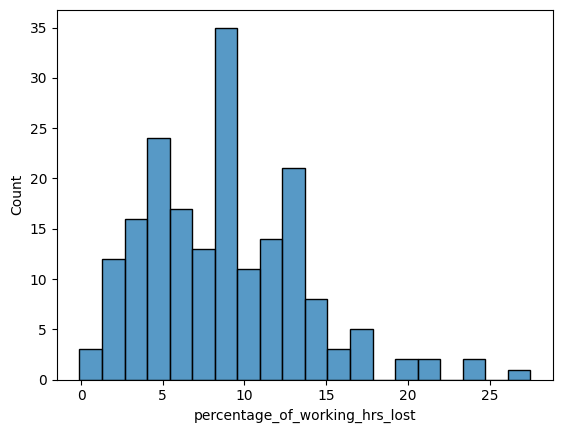

In [ ]:
sns.histplot(countries_df['percentage_of_working_hrs_lost'], bins=20)
plt.show()

In [ ]:
# Find countries with the highest percentage of lost working hours
employment_df.sort_values(by=['percentage_of_working_hrs_lost'], ascending=False)[['country', 'percentage_of_working_hrs_lost']]

,country,percentage_of_working_hrs_lost
131,Peru,27.5
71,Honduras,24.3
130,Panama,23.5
4,Argentina,21.0
36,Colombia,20.9
...,...,...
18,Belarus,1.3
55,Finland,1.3
121,Niger,1.1
127,New Zealand,0.8


In [ ]:
# Is -0.1 an outlier?

In [ ]:
# Get some descriptive stats about the % of lost working hours for regions
regions_df['percentage_of_working_hrs_lost'].describe()

count    94.000000
mean      9.139362
std       3.457428
min       2.500000
25%       7.000000
50%       8.800000
75%      10.575000
max      18.500000
Name: percentage_of_working_hrs_lost, dtype: float64